# What are the most listed household appliences within 50 miles of my zip code?

I decided to take a look at the household appliances being listed on Craigslist within a 50 mile radius of my zipcode. The problem itself is not necessarily particularly interesting, but it does present an opportunity to practice some of the skills that I've learned over the last couple of months.

#### My strategy
- Design a web crawler to scrape the Craigslist listing for household appliances within a 50 mile radius
- Leverage the fuzzywyzzy python library to match the descriptions of the listed items to a standard 'curated' list of common household appliances
- Generate some insight into which items are being listed most commonly and what their asking prices are

#### Long term aspirations
I would like to continue developing this project, such that eventually I can automatically pull in the listing daily or weekly. This will require a more robust web crawler, as well as a local database to store the updated information. I hope to continue working on this project to get it to that stage :)

In [1]:
import numpy as np
import pandas as pd
import re
from fuzzywuzzy import process
from operator import itemgetter

## Scrape the Craiglist appliances listing

Here I am leveraging the BeutifulSoup python library.

In [ ]:
#import get to call a get request on the site
from requests import get

In [127]:
#get the first 120 listing of the east bay housing prices
response_1 = get('https://houston.craigslist.org/search/ppa?search_distance=50&postal=77079') 

#get listings 121 to 240
response_2 = get('https://houston.craigslist.org/search/ppa?postal=77079&s=120&search_distance=50')

#get the listings 241 to 360
response_3 = get('https://houston.craigslist.org/search/ppa?postal=77079&s=240&search_distance=50')

#get listings 361 to 480
response_4 = get('https://houston.craigslist.org/search/ppa?postal=77079&s=360&search_distance=50')

We now need to grab all of the posts, from each of the Craigslist pages, that got captured as a result of the get() function for each of the provided URL. The function below is set up to do that, by first parsing the html text, then finding the correct classes within the html, and lastly capturing the fields of interest - 'title', 'price', and 'data'.

The function needs to be executed a total of **four** times to capture all of the listing.

In [181]:
#create function to grab the posts
def grab_posts(response, end_value):   
    html_soup = BeautifulSoup(response.text, 'html.parser')
    posts = html_soup.find_all('li', class_ = 'result-row')
#     return posts_i

    print(type(posts))
    print(len(posts))
    
    #get item description, item price, and listing dates for each item
    items = []
    prices = []
    dates = []

    for i in range(end_value):
        items.append(posts[i].find(class_ = 'result-title hdrlnk').text)
        prices.append(posts[i].find(class_ = 'result-price').text)
        dates.append(posts[i].find(class_ = 'result-date').text)
    print(len(items))
        
    #create Series from items
    items_col = pd.Series(items)

    #create Series from prices
    prices_col = pd.Series(prices)

    #create Series from dates
    dates_col = pd.Series(dates)
    print(type(dates_col))
    
    #concatenate
    global out_df
    out_df = pd.concat([items_col, prices_col, dates_col], axis = 1)
    print(out_df.head())
    
    out_df.rename(columns = {
                0: 'item_description',
                1: 'price',
                2: 'date_listed'
            }, inplace = True)
    
    print(out_df.head())
    print(type(out_df))
    
    return out_df

Here, I call the function four times to scrape the data from 4 pages of Craigslist appliance listing. This piece needs further improvement, so that all of the pages can be scraped automatically. I did not have enough time to figure out how to do that. Furthermore, ideally these data would be wirtten directly to a data base, from which the data would later be read into this notebook for analysis. 

In [185]:
grab_posts(response_1, 120)
data_frame_1 = out_df

<class 'bs4.element.ResultSet'>
120
120
<class 'pandas.core.series.Series'>
                                                   0     1       2
0                          36" Thermador gas cooktop  $250  Mar 21
1                                       Standing fan   $20  Mar 21
2                                  Samsung Gas Dryer  $200  Mar 22
3                                 Ultrasonic Cleaner   $30  Apr  2
4  Talking Microwave - Hamilton Beach 0.9 cu ft -...   $50  Apr  5
                                    item_description price date_listed
0                          36" Thermador gas cooktop  $250      Mar 21
1                                       Standing fan   $20      Mar 21
2                                  Samsung Gas Dryer  $200      Mar 22
3                                 Ultrasonic Cleaner   $30      Apr  2
4  Talking Microwave - Hamilton Beach 0.9 cu ft -...   $50      Apr  5
<class 'pandas.core.frame.DataFrame'>


In [187]:
grab_posts(response_2, 120)
data_frame_2 = out_df

<class 'bs4.element.ResultSet'>
120
120
<class 'pandas.core.series.Series'>
                                                0     1       2
0                            Stainless Steel tray   $25  Mar 23
1                                        Tool Box   $10  Apr 12
2         LG Inverter Direct Drive Washer & Dryer  $900  Apr  6
3  Kenmoreclear Kenmore Refrigerator Water Filter   $18  Mar  3
4               Motion activated sensor trash can   $90  Mar  8
                                 item_description price date_listed
0                            Stainless Steel tray   $25      Mar 23
1                                        Tool Box   $10      Apr 12
2         LG Inverter Direct Drive Washer & Dryer  $900      Apr  6
3  Kenmoreclear Kenmore Refrigerator Water Filter   $18      Mar  3
4               Motion activated sensor trash can   $90      Mar  8
<class 'pandas.core.frame.DataFrame'>


In [189]:
grab_posts(response_3, 120)
data_frame_3 = out_df

<class 'bs4.element.ResultSet'>
120
120
<class 'pandas.core.series.Series'>
                                     0     1       2
0  Jockey Box/ Ice  Bin/ Caja de hielo  $300  Mar 28
1  Jockey Box/ Ice  Bin/ Caja de hielo  $300  Mar 28
2  Jockey Box/ Ice  Bin/ Caja de hielo  $300  Mar 28
3  Jockey Box/ Ice  Bin/ Caja de hielo  $300  Mar 28
4                       Dryer for Sale   $60  Mar 28
                      item_description price date_listed
0  Jockey Box/ Ice  Bin/ Caja de hielo  $300      Mar 28
1  Jockey Box/ Ice  Bin/ Caja de hielo  $300      Mar 28
2  Jockey Box/ Ice  Bin/ Caja de hielo  $300      Mar 28
3  Jockey Box/ Ice  Bin/ Caja de hielo  $300      Mar 28
4                       Dryer for Sale   $60      Mar 28
<class 'pandas.core.frame.DataFrame'>


In [191]:
grab_posts(response_4, 120)
data_frame_4 = out_df

<class 'bs4.element.ResultSet'>
120
120
<class 'pandas.core.series.Series'>
                                             0     1       2
0                       Amana Washer and Dryer  $500  Apr  9
1  Free fully functional fridge - pick up only    $0  Apr 13
2                            Laundry repair ⚡️   $50  Mar 12
3                      Hamilton Change Machine  $300  Mar  6
4           Wascomat Washers W74 W75 W124 W184    $1  Mar  6
                              item_description price date_listed
0                       Amana Washer and Dryer  $500      Apr  9
1  Free fully functional fridge - pick up only    $0      Apr 13
2                            Laundry repair ⚡️   $50      Mar 12
3                      Hamilton Change Machine  $300      Mar  6
4           Wascomat Washers W74 W75 W124 W184    $1      Mar  6
<class 'pandas.core.frame.DataFrame'>


These four separate data sets are now combined together into one data frame for analysis.

In [272]:
#concatenate all of the data sets
full_df = pd.concat([data_frame_1, data_frame_2, data_frame_3, data_frame_4])

In [273]:
full_df.shape

(480, 3)

## Analysis strategy.

Scraping Craigslist is just the beginning of the story - it's interesting to leverage these data tounderstand what items are being listed the most frequently in my area and how much they are being listed for. Application for this analysis can be extended to other areas of Craiglist, such as gaining insight into the distribution of prices of rental listing or different job listings. The appliances are just a starting point!

#### A problem that needs to be resolved prior to proceeding.
Prior to being able to analyze the data, we need to 'standardize' these listing. Here is why this needs to be done - right now same type of listings are being submitted with wildly different descriptions. Take a look at the example below:

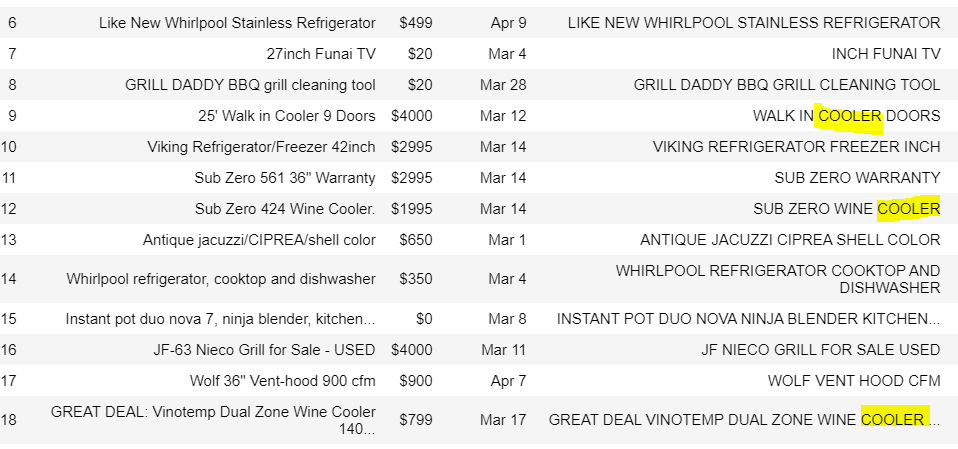

Here a cooler is being listed three times; however, the descriptions are completely different. This presents a problem for analytics, since panda and sklearn libraries will not automatically identify these three listings as being the same object type. **This needs to get fixed before analysis can begin.**

## How to standardize the listings?

The fuzzywuzzy python library is a string matcing algorithms that uses Levenshtein Distance to calculate the differences between sequences (source: https://pypi.org/project/fuzzywuzzy/). I decided to try and use it here to match the listing to a master list of household appliances that I put together.

First, the string fields in the data frame need to be cleaned up and formatted. Here, I decided to convert all the descriptions to upper case and convert them to 'string' type, since there are integers/floats present in some of the descriptions. I also remove non-letter characters from the listings (using the re library).

In [277]:
full_df['description_upper'] = full_df['item_description'].str.upper()

In [303]:
full_df['description_upper'] = full_df['description_upper'].astype(str)

In [304]:
full_df['description_upper'] = full_df['description_upper'].apply(lambda x: re.sub("[^a-zA-Z]", " ", str(x)))

The fuzzy match needs to have a 'gold standard' list of items that can be used to match these appliance descriptions to. I put together a list of 'common' household appliances into an Excel file and will use this file in my fuzzy match.

In [219]:
#import the list of common househod appliances to match again
common_app = pd.read_excel('appliance_list.xlsx')
common_app['appliance_name'] = common_app['appliance_name'].str.upper()
common_app['source'] = 'excel list'
print(common_app.head(5))
print(common_app.shape)

         appliance_name      source
0   AIR CONDITIONER      excel list
1       AIR IONISER      excel list
2      AIR PURIFIER      excel list
3    APPLIANCE PLUG      excel list
4        AROMA LAMP      excel list
(143, 2)


I've gone ahead and applied the same formatting to the appliance list.

In [232]:
common_app['appliance_name'] = common_app['appliance_name'].astype(str)
common_app['appliance_name'] = common_app['appliance_name'].apply(lambda x: re.sub("[^a-zA-Z]", " ", str(x)))

#### Implementing the fuzzy match

In [282]:
full_df['matched_description'] = full_df.apply(lambda x: process.extractOne(x['description_upper'],
                                                                            common_app['appliance_name']),
                                               axis = 1)

In [283]:
full_df.head(20)

,item_description,price,date_listed,description_upper,matched_description
0,"36"" Thermador gas cooktop",$250,Mar 21,THERMADOR GAS COOKTOP,"( GAS APPLIANCE , 86, 60)"
1,Standing fan,$20,Mar 21,STANDING FAN,"( BOX FAN , 86, 11)"
2,Samsung Gas Dryer,$200,Mar 22,SAMSUNG GAS DRYER,"( FUTON DRYER , 86, 58)"
3,Ultrasonic Cleaner,$30,Apr 2,ULTRASONIC CLEANER,"( BLENDER , 69, 10)"
4,Talking Microwave - Hamilton Beach 0.9 cu ft -...,$50,Apr 5,TALKING MICROWAVE HAMILTON BEACH CU FT ...,"( MICROWAVE OVEN , 86, 85)"
5,Mr Coffee COFFEE MAKER,$30,Apr 5,MR COFFEE COFFEE MAKER,"( COFFEE GRINDER , 86, 24)"
6,Like New Whirlpool Stainless Refrigerator,$499,Apr 9,LIKE NEW WHIRLPOOL STAINLESS REFRIGERATOR,"( REFRIGERATOR , 90, 101)"
7,27inch Funai TV,$20,Mar 4,INCH FUNAI TV,"( KITCHEN STOVE , 46, 114)"
8,GRILL DADDY BBQ grill cleaning tool,$20,Mar 28,GRILL DADDY BBQ GRILL CLEANING TOOL,"( CEILING FAN , 55, 17)"
9,25' Walk in Cooler 9 Doors,$4000,Mar 12,WALK IN COOLER DOORS,"( COOLER , 90, 28)"


There are some really great matches! Descriptions for things like 'cooler', 'dishwasher', 'freezer', 'refrigerator' are standardized. However, there are also mistakes :( As an example, take a look at line 13 - a listing for a jacuzzi is mistaken for a 'cooler'. On line 16, a grill is mistaken for a mouse....

There are some things that can be done to improve this. For example, the 'gold standard' list can be improved by adding more items. Also, there are other string matching algorithms that can be used, alongside fuzzy wuzzy, and the outcomes from these algorithms can be compared. INstances where there is agreemend from multiple algorithms can be advanced forward and instances of discord taken out of the data set.

No analysis is perfect, but here I chose to apply a threshold of 70 to remove observations that are a poor match.

In [245]:
#clean up the outcome column
for i in range(3):
    full_df['Col {}'.format(i)] = full_df.matched_description.apply(itemgetter(i))
    
full_df_final = full_df.drop(['matched_description', 'Col 2'], axis = 1).rename(columns = {
    'Col 0': 'matched_description',
    'Col 1': 'score'
})

full_df_final.head()

,item_description,price,date_listed,description_upper,matched_description,score
0,"36"" Thermador gas cooktop",$250,Mar 21,THERMADOR GAS COOKTOP,GAS APPLIANCE,86
1,Standing fan,$20,Mar 21,STANDING FAN,BOX FAN,86
2,Samsung Gas Dryer,$200,Mar 22,SAMSUNG GAS DRYER,FUTON DRYER,86
3,Ultrasonic Cleaner,$30,Apr 2,ULTRASONIC CLEANER,BLENDER,69
4,Talking Microwave - Hamilton Beach 0.9 cu ft -...,$50,Apr 5,TALKING MICROWAVE HAMILTON BEACH CU FT ...,MICROWAVE OVEN,86


In [246]:
#keep observations where the score is above 70
mask = full_df_final['score'] > 70
analysis_df = full_df_final[mask]

In [264]:
#remove leading and lagging white space from the data frame columns
analysis_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

,item_description,price,date_listed,description_upper,matched_description,score
0,"36"" Thermador gas cooktop",$250,Mar 21,THERMADOR GAS COOKTOP,GAS APPLIANCE,86
1,Standing fan,$20,Mar 21,STANDING FAN,BOX FAN,86
2,Samsung Gas Dryer,$200,Mar 22,SAMSUNG GAS DRYER,FUTON DRYER,86
4,Talking Microwave - Hamilton Beach 0.9 cu ft -...,$50,Apr 5,TALKING MICROWAVE HAMILTON BEACH CU FT ...,MICROWAVE OVEN,86
5,Mr Coffee COFFEE MAKER,$30,Apr 5,MR COFFEE COFFEE MAKER,COFFEE GRINDER,86
...,...,...,...,...,...,...
114,Shark Steam Mop,$45,Apr 1,SHARK STEAM MOP,STEAM MOP,90
115,Refrigerator. Side by side.,$180,Mar 26,REFRIGERATOR SIDE BY SIDE,REFRIGERATOR,90
116,Panasonic Microwave,$80,Apr 2,PANASONIC MICROWAVE,MICROWAVE OVEN,74
117,Appliance pickup,$0,Mar 29,APPLIANCE PICKUP,APPLIANCE PLUG,80


We are left with 393 matches from our original 480 observations. I then write this data set into a csv file, which can be used for analysis at a later date or in a different place, without needing to redo the scraping and data cleaning/fuzzy matching step.

In [265]:
analysis_df.shape

(393, 6)

In [248]:
analysis_df.to_csv('appliances.csv')

## So, what does get listed within a 50 mile radius of me and how much are these items going for?

#### Let's start by identifying the top five items being listed and seeing how much these are going for.

In [266]:
#What is the most sold appliance?
analysis_df['matched_description'].value_counts()

 CLOTHES DRYER          51
 REFRIGERATOR           38
 AIR CONDITIONER        28
 MICROWAVE OVEN         21
 BOX FAN                20
                        ..
 HAIR DRYER              1
 FAN HEATER              1
 WASHING MACHINE         1
 RADIO RECEIVER          1
 OIL HEATER              1
Name: matched_description, Length: 70, dtype: int64

The top five items are:
- Clothes dryer
- Refrigerator
- Air conditioner (not surprising in Texas!)
- MIcrowave
- Fan (again, not a surprise)

In [284]:
#Here I need to once again strip the white space. Also, not sure what this warning is about...
analysis_df['matched_description'] = analysis_df['matched_description'].str.strip()

C:\Users\yakan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [291]:
#grab the listing for the top 5 items and figure out the price distribution
analysis_df_subset = analysis_df[(analysis_df['matched_description'] == 'CLOTHES DRYER') |
                                 (analysis_df['matched_description'] == 'REFRIGERATOR') |
                                 (analysis_df['matched_description'] == 'AIR CONDITIONER') |
                                 (analysis_df['matched_description'] == 'MICROWAVE OVEN') |
                                 (analysis_df['matched_description'] == 'BOX FAN')]

In [298]:
#convert price to an actual number
analysis_df_subset['price'] = analysis_df_subset['price'].replace('[\$,]', '', regex=True).astype(int)

C:\Users\yakan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
analysis_df_subset.tail()

,item_description,price,date_listed,description_upper,matched_description,score
99,Gas Clothes Dryer,50,Mar 30,GAS CLOTHES DRYER,CLOTHES DRYER,95
107,Used Frigidaire Affinity Front Load Washer or ...,200,Apr 14,USED FRIGIDAIRE AFFINITY FRONT LOAD WASHER OR ...,CLOTHES DRYER,86
115,Refrigerator. Side by side.,180,Mar 26,REFRIGERATOR SIDE BY SIDE,REFRIGERATOR,90
116,Panasonic Microwave,80,Apr 2,PANASONIC MICROWAVE,MICROWAVE OVEN,74
119,Refridgerator,275,Mar 6,REFRIDGERATOR,REFRIGERATOR,96


In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

#### It may be interesting to take a look at the price distribution of the top five most listed items in my area.

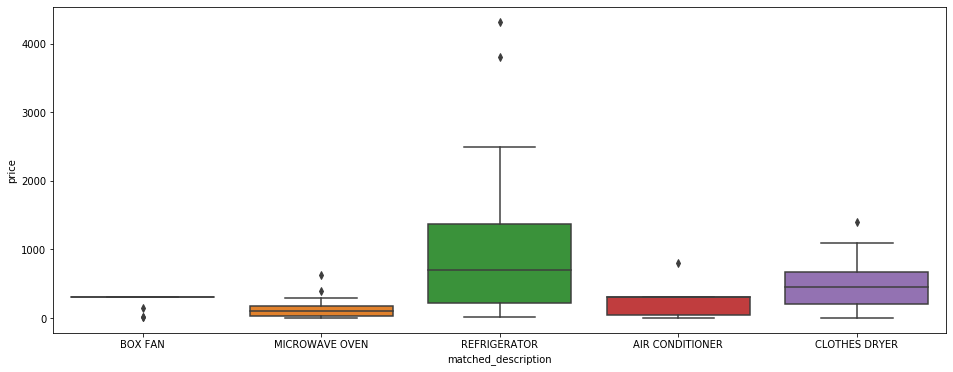

In [300]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='matched_description', y='price', data=analysis_df_subset)

Some summary statistics to go along with the graph.

In [307]:
analysis_df_subset[['matched_description', 'price']].groupby(['matched_description']).describe()

price                                                \
                    count        mean          std   min     25%    50%   
matched_description                                                       
AIR CONDITIONER      28.0  221.535714   173.777525   1.0   49.25  300.0   
BOX FAN              20.0  264.100000    91.210514  12.0  300.00  300.0   
CLOTHES DRYER        51.0  456.019608   323.800710   0.0  200.00  450.0   
MICROWAVE OVEN       21.0  138.523810   154.645924   0.0   30.00   99.0   
REFRIGERATOR         38.0  959.947368  1002.576760  15.0  218.75  704.5   

                                      
                         75%     max  
matched_description                   
AIR CONDITIONER       300.00   799.0  
BOX FAN               300.00   300.0  
CLOTHES DRYER         674.50  1400.0  
MICROWAVE OVEN        175.00   630.0  
REFRIGERATOR         1374.25  4321.0

Wow, there is a refrigerator that's selling for over $4K! Let's take a closer look...

In [301]:
crazy_refrigerator = analysis_df_subset.groupby(['matched_description'])
crazy_refrigerator.get_group('REFRIGERATOR').max()

item_description       WHIRLPOOL 21.4-CU FT SIDE-BY-SIDE REFRIGERATOR...
price                                                               4321
date_listed                                                       Mar 29
description_upper      WHIRLPOOL      CU FT SIDE BY SIDE REFRIGERATOR...
matched_description                                         REFRIGERATOR
score                                                                100
dtype: object

It's being listed for $4,321 and is a 'Whirlpool', which is generally an expensive brand. It would be interesting to make the scraping of the listings more advanced. For example, including the actual detailed description, which is usually attached to each item. This way we can identify if higher prices may correlate to an item being identified as 'new'. 

#### Are the most frequently listed items also the most expensive? Let's take a look at the distribution of all the prices.

In [308]:
#convert price to an actual number for the full data set
analysis_df['price'] = analysis_df['price'].replace('[\$,]', '', regex=True).astype(int)

C:\Users\yakan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


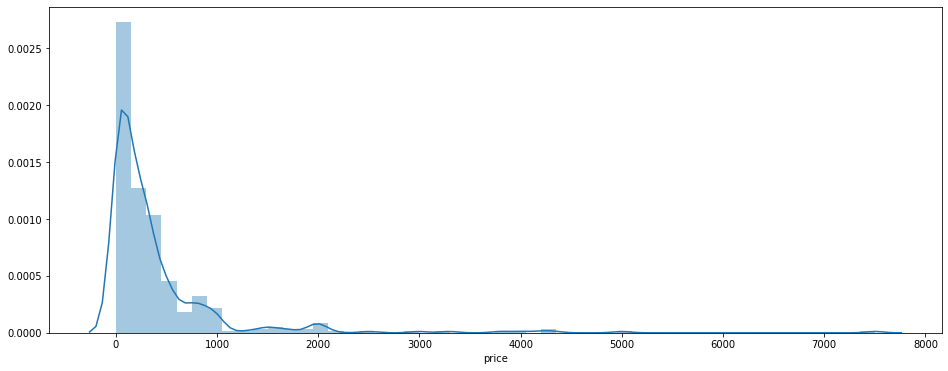

In [310]:
plt.figure(figsize=(16, 6))
sns.distplot(analysis_df['price'])

There are items selling for way more than the top 5 listed items are selling for. What are they?

In [314]:
mask = analysis_df['price'] > 4000
expensive = analysis_df[mask]

In [317]:
expensive.sort_values(by = 'price').head()

,item_description,price,date_listed,description_upper,matched_description,score
20,Viking Commercial Double Oven,4200,Apr 10,VIKING COMMERCIAL DOUBLE OVEN,OVEN,90
76,Refrigerator cheap with warranty,4321,Mar 18,REFRIGERATOR CHEAP WITH WARRANTY,REFRIGERATOR,90
30,SINGER 300U DOUBLE NEEDLE CHAINSTITCH MACHINE ...,5000,Apr 13,SINGER U DOUBLE NEEDLE CHAINSTITCH MACHINE ...,SEWING MACHINE,86
42,**Norlake Walk-in Freezer & Walk-in Cooler **N...,7500,Mar 16,NORLAKE WALK IN FREEZER WALK IN COOLER N...,COOLER,90


# Conclusion

This was a really interesting exercise and it was fun to discover the items that are being sold on Craigslist in my area. I would like to improve on:
- Change the single page scraping into an actual web crawler that would grab all of the information from all of the pages in one go and also grab the detailed information from each listing. These details would be fun to text mine.
- Improve my string matching from the 'gold standard' list of appliances to improve performance.



#### Legacy code - ignore

In [ ]:
# #get the first page of the east bay housing prices
# response = get('https://houston.craigslist.org/search/ppa?search_distance=50&postal=77079') 

# from bs4 import BeautifulSoup
# html_soup = BeautifulSoup(response.text, 'html.parser')

# #get the macro-container for the appliance posts
# posts = html_soup.find_all('li', class_= 'result-row')
# print(type(posts)) #check that you get a ResultSet
# print(len(posts)) #check that you get 120 (elements/page)

In [196]:
# posts[0]

In [197]:
#get item description
# posts[0].find(class_ = 'result-title hdrlnk').text

In [198]:
#get item price
# posts[0].find(class_ = 'result-price').text

In [199]:
# posts[0].find(class_ = 'result-date').text

In [200]:
# items = []
# prices = []
# dates = []

# for i in range(120):
#     items.append(posts[i].find(class_ = 'result-title hdrlnk').text)
#     prices.append(posts[i].find(class_ = 'result-price').text)
#     dates.append(posts[i].find(class_ = 'result-date').text)

In [201]:
# #create Series from items
# items_col = pd.Series(items)

# #create Series from prices
# prices_col = pd.Series(prices)

# #create Series from dates
# dates_col = pd.Series(dates)

In [202]:
# #concatenate
# data_frame = pd.concat([items_col, prices_col, dates_col], axis = 1)

In [203]:
# data_frame.rename(columns = {
#                 0: 'item_description',
#                 1: 'price',
#                 2: 'date_listed'
#             }, inplace = True)